10:18:37 - cmdstanpy - INFO - Chain [1] start processing
10:18:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name],

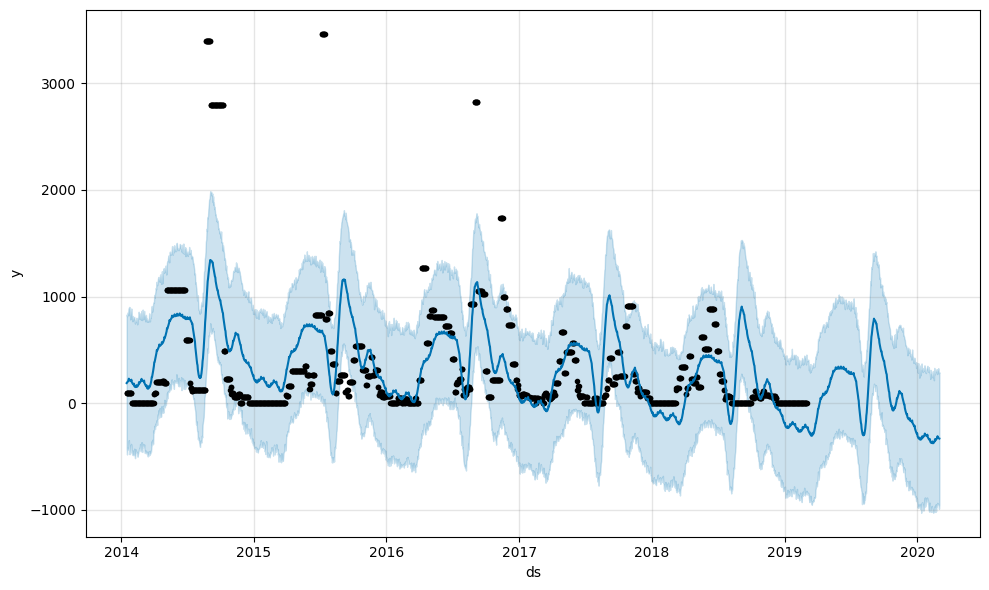

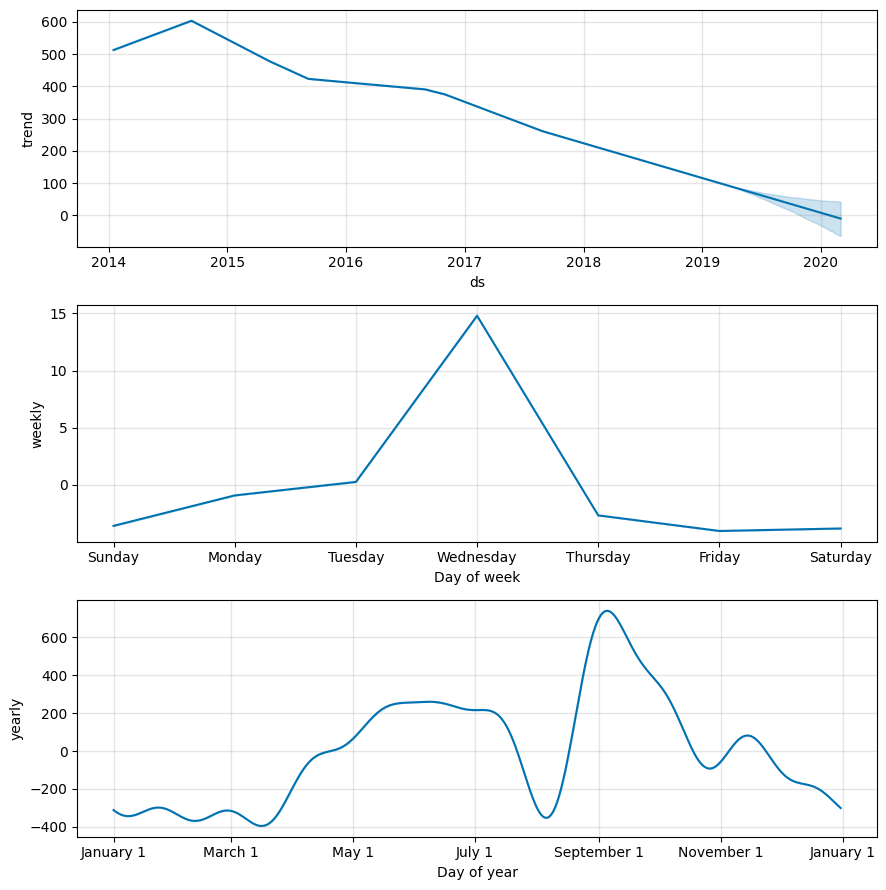

In [3]:
import pandas as pd
from prophet import Prophet
data = pd.read_csv('../data/processed/resultado_plantilla.csv')

df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(df['fecha'])

# Formatear los datos para Prophet
df_prophet = df[['fecha', 'ao']].rename(columns={'fecha': 'ds', 'ao': 'y'})

# Inicializar el modelo Prophet
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)

# Ajustar el modelo
model.fit(df_prophet)

# Crear un dataframe de fechas futuras (o usar las mismas fechas para obtener las características)
future_dates = model.make_future_dataframe(periods=365)

# Hacer predicciones
forecast = model.predict(future_dates)

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

df_to_export = forecast[['ds', 'yhat']]
df_to_export.to_csv('../data/processed/ao_prophet.csv', index=False)


In [3]:
from prophet.diagnostics import cross_validation

# Ajusta tu modelo 'm' previamente entrenado
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Muestra los resultados
df_cv.head()

  0%|          | 0/5 [00:00<?, ?it/s]

12:26:31 - cmdstanpy - INFO - Chain [1] start processing
12:26:31 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.62it/s]12:26:31 - cmdstanpy - INFO - Chain [1] start processing
12:26:31 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.34it/s]12:26:31 - cmdstanpy - INFO - Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.24it/s]12:26:32 - cmdstanpy - INFO - Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:00<00:00,  3.95it/s]12:26:32 - cmdstanpy - INFO - Chain [1] start processing
12:26:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.90it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-03-14,-61.823918,-769.548401,690.801728,0.0,2016-03-13
1,2016-03-15,-55.696661,-794.865801,704.159078,0.0,2016-03-13
2,2016-03-16,-35.170856,-764.182951,637.398588,0.0,2016-03-13
3,2016-03-17,-55.034837,-769.628201,651.376326,0.0,2016-03-13
4,2016-03-18,-49.390854,-733.126508,685.241826,0.0,2016-03-13


In [7]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
import pandas as pd

# Carga tus datos y crea un DataFrame 'df_prophet'

# Inicializa el modelo
m = Prophet()

# Ajusta los hiperparámetros
m.changepoint_prior_scale = 0.05
m.seasonality_prior_scale = 10

# Realiza la validación cruzada
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calcula métricas de rendimiento
from prophet.diagnostics import performance_metrics
df_perf = performance_metrics(df_cv)
print(df_perf.head())

  0%|          | 0/5 [00:00<?, ?it/s]12:27:49 - cmdstanpy - INFO - Chain [1] start processing
12:27:49 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:01,  3.87it/s]12:27:49 - cmdstanpy - INFO - Chain [1] start processing
12:27:49 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  3.56it/s]12:27:49 - cmdstanpy - INFO - Chain [1] start processing
12:27:49 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  3.73it/s]12:27:50 - cmdstanpy - INFO - Chain [1] start processing
12:27:50 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:01<00:00,  3.56it/s]12:27:50 - cmdstanpy - INFO - Chain [1] start processing
12:27:50 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


  horizon            mse        rmse         mae     mdape     smape  coverage
0 37 days  337967.130767  581.349405  454.219334  1.650915  1.241917  0.764835
1 38 days  334252.740613  578.145951  452.135027  1.637951  1.232807  0.775824
2 39 days  331304.981303  575.590984  450.595565  1.637951  1.228502  0.783516
3 40 days  329358.189095  573.897368  450.926077  1.637951  1.228225  0.785714
4 41 days  326980.555753  571.822136  450.404951  1.637951  1.225448  0.785714


In [8]:
from itertools import product
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import pandas as pd

# Carga tus datos y crea un DataFrame 'df_prophet'

# Define una cuadrícula de hiperparámetros
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_prior_scale': [5, 10, 20]
}

# Prueba todas las combinaciones
for params in product(*param_grid.values()):
    m = Prophet(changepoint_prior_scale=params[0], seasonality_prior_scale=params[1])
    m.fit(df_prophet)  # Entrena el modelo con tus datos
    df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
    df_perf = performance_metrics(df_cv)
    print(f"Hiperparámetros: {params}, MAE: {df_perf['mae'].mean()}")

12:29:05 - cmdstanpy - INFO - Chain [1] start processing
12:29:05 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/5 [00:00<?, ?it/s]12:29:05 - cmdstanpy - INFO - Chain [1] start processing
12:29:05 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.59it/s]12:29:05 - cmdstanpy - INFO - Chain [1] start processing
12:29:05 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.34it/s]12:29:05 - cmdstanpy - INFO - Chain [1] start processing
12:29:05 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.17it/s]12:29:06 - cmdstanpy - INFO - Chain [1] start processing
12:29:06 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:01<00:00,  3.80it/s]12:29:06 - cmdstanpy - INFO - Chain [1] start processing
12:29:06 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.81it/s]
12:29:06 - cmdstanpy - INFO - Chain [1] start processing
12

Hiperparámetros: (0.01, 5), MAE: 532.5936273335241


  0%|          | 0/5 [00:00<?, ?it/s]12:29:07 - cmdstanpy - INFO - Chain [1] start processing
12:29:07 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.60it/s]12:29:07 - cmdstanpy - INFO - Chain [1] start processing
12:29:07 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.31it/s]12:29:07 - cmdstanpy - INFO - Chain [1] start processing
12:29:07 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.24it/s]12:29:07 - cmdstanpy - INFO - Chain [1] start processing
12:29:07 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:00<00:00,  3.90it/s]12:29:08 - cmdstanpy - INFO - Chain [1] start processing
12:29:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.80it/s]
12:29:08 - cmdstanpy - INFO - Chain [1] start processing
12:29:08 - cmdstanpy - INFO - Chain [1] done processing


Hiperparámetros: (0.01, 10), MAE: 532.5936273335241


  0%|          | 0/5 [00:00<?, ?it/s]12:29:08 - cmdstanpy - INFO - Chain [1] start processing
12:29:08 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.27it/s]12:29:08 - cmdstanpy - INFO - Chain [1] start processing
12:29:09 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.22it/s]12:29:09 - cmdstanpy - INFO - Chain [1] start processing
12:29:09 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.13it/s]12:29:09 - cmdstanpy - INFO - Chain [1] start processing
12:29:09 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:01<00:00,  3.83it/s]12:29:09 - cmdstanpy - INFO - Chain [1] start processing
12:29:09 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.81it/s]
12:29:10 - cmdstanpy - INFO - Chain [1] start processing


Hiperparámetros: (0.01, 20), MAE: 532.5936273335241


12:29:10 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/5 [00:00<?, ?it/s]12:29:10 - cmdstanpy - INFO - Chain [1] start processing
12:29:10 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.65it/s]12:29:10 - cmdstanpy - INFO - Chain [1] start processing
12:29:10 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.39it/s]12:29:10 - cmdstanpy - INFO - Chain [1] start processing
12:29:11 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.26it/s]12:29:11 - cmdstanpy - INFO - Chain [1] start processing
12:29:11 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:01<00:00,  3.53it/s]12:29:11 - cmdstanpy - INFO - Chain [1] start processing
12:29:11 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.69it/s]
12:29:12 - cmdstanpy - INFO - Chain [1] start processing


Hiperparámetros: (0.1, 5), MAE: 532.5936273335241


12:29:12 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/5 [00:00<?, ?it/s]12:29:12 - cmdstanpy - INFO - Chain [1] start processing
12:29:12 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.37it/s]12:29:12 - cmdstanpy - INFO - Chain [1] start processing
12:29:12 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.05it/s]12:29:12 - cmdstanpy - INFO - Chain [1] start processing
12:29:12 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.00it/s]12:29:13 - cmdstanpy - INFO - Chain [1] start processing
12:29:13 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:01<00:00,  3.72it/s]12:29:13 - cmdstanpy - INFO - Chain [1] start processing
12:29:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.68it/s]
12:29:13 - cmdstanpy - INFO - Chain [1] start processing


Hiperparámetros: (0.1, 10), MAE: 532.5936273335241


12:29:14 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/5 [00:00<?, ?it/s]12:29:14 - cmdstanpy - INFO - Chain [1] start processing
12:29:14 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.52it/s]12:29:14 - cmdstanpy - INFO - Chain [1] start processing
12:29:14 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.33it/s]12:29:14 - cmdstanpy - INFO - Chain [1] start processing
12:29:14 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.25it/s]12:29:14 - cmdstanpy - INFO - Chain [1] start processing
12:29:15 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:00<00:00,  3.89it/s]12:29:15 - cmdstanpy - INFO - Chain [1] start processing
12:29:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
12:29:15 - cmdstanpy - INFO - Chain [1] start processing


Hiperparámetros: (0.1, 20), MAE: 532.5936273335241


12:29:16 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/5 [00:00<?, ?it/s]12:29:16 - cmdstanpy - INFO - Chain [1] start processing
12:29:16 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.72it/s]12:29:16 - cmdstanpy - INFO - Chain [1] start processing
12:29:16 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.37it/s]12:29:17 - cmdstanpy - INFO - Chain [1] start processing
12:29:17 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.28it/s]12:29:17 - cmdstanpy - INFO - Chain [1] start processing
12:29:17 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:00<00:00,  3.91it/s]12:29:17 - cmdstanpy - INFO - Chain [1] start processing
12:29:17 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
12:29:18 - cmdstanpy - INFO - Chain [1] start processing


Hiperparámetros: (1.0, 5), MAE: 532.5936273335241


12:29:19 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/5 [00:00<?, ?it/s]12:29:19 - cmdstanpy - INFO - Chain [1] start processing
12:29:19 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.60it/s]12:29:19 - cmdstanpy - INFO - Chain [1] start processing
12:29:19 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.32it/s]12:29:19 - cmdstanpy - INFO - Chain [1] start processing
12:29:19 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.26it/s]12:29:19 - cmdstanpy - INFO - Chain [1] start processing
12:29:20 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:00<00:00,  3.92it/s]12:29:20 - cmdstanpy - INFO - Chain [1] start processing
12:29:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
12:29:20 - cmdstanpy - INFO - Chain [1] start processing


Hiperparámetros: (1.0, 10), MAE: 532.5936273335241


12:29:21 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/5 [00:00<?, ?it/s]12:29:21 - cmdstanpy - INFO - Chain [1] start processing
12:29:21 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.46it/s]12:29:21 - cmdstanpy - INFO - Chain [1] start processing
12:29:22 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  4.27it/s]12:29:22 - cmdstanpy - INFO - Chain [1] start processing
12:29:22 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  4.25it/s]12:29:22 - cmdstanpy - INFO - Chain [1] start processing
12:29:22 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:00<00:00,  3.92it/s]12:29:22 - cmdstanpy - INFO - Chain [1] start processing
12:29:22 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  3.86it/s]


Hiperparámetros: (1.0, 20), MAE: 532.5936273335241
